In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
#changed file path to the one in the folder "data" on github
df = pd.read_csv('../data/covid_data/CovidFaelle_Altersgruppe.csv', delimiter=';')

In [144]:
df.head()

,Time,AltersgruppeID,Altersgruppe,Bundesland,BundeslandID,AnzEinwohner,Geschlecht,Anzahl,AnzahlGeheilt,AnzahlTot
0,26.02.2020 00:00:00,1,<5,Burgenland,1,6217,M,0,0,0
1,26.02.2020 00:00:00,1,<5,Burgenland,1,5880,W,0,0,0
2,26.02.2020 00:00:00,1,<5,Kärnten,2,12177,M,0,0,0
3,26.02.2020 00:00:00,1,<5,Kärnten,2,11644,W,0,0,0
4,26.02.2020 00:00:00,1,<5,Niederösterreich,3,40378,M,0,0,0


In [145]:
df.drop(columns=['BundeslandID', 'AnzahlGeheilt', 'Geschlecht'], inplace=True)

In [151]:
#Converting Time to dattime object, only contains date without hours
df['Time'] = df['Time'].astype('str').str.split(' ', 0, expand=True)
df['Time'] = df['Time'].str.split('\'', 2, expand=True)
df['Time'] = pd.to_datetime(df['Time'])

In [152]:
df.head()

,Time,AltersgruppeID,Altersgruppe,Bundesland,AnzEinwohner,Anzahl,AnzahlTot
0,2020-02-26,1,<5,Burgenland,6217,0,0
1,2020-02-26,1,<5,Burgenland,5880,0,0
2,2020-02-26,1,<5,Kärnten,12177,0,0
3,2020-02-26,1,<5,Kärnten,11644,0,0
4,2020-02-26,1,<5,Niederösterreich,40378,0,0


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197800 entries, 0 to 197799
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Time            197800 non-null  datetime64[ns]
 1   AltersgruppeID  197800 non-null  int64         
 2   Altersgruppe    197800 non-null  object        
 3   Bundesland      197800 non-null  object        
 4   AnzEinwohner    197800 non-null  int64         
 5   Anzahl          197800 non-null  int64         
 6   AnzahlTot       197800 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 10.6+ MB


In [165]:
df_grouped_bundesland = df[(df['Bundesland'] == 'Österreich')]

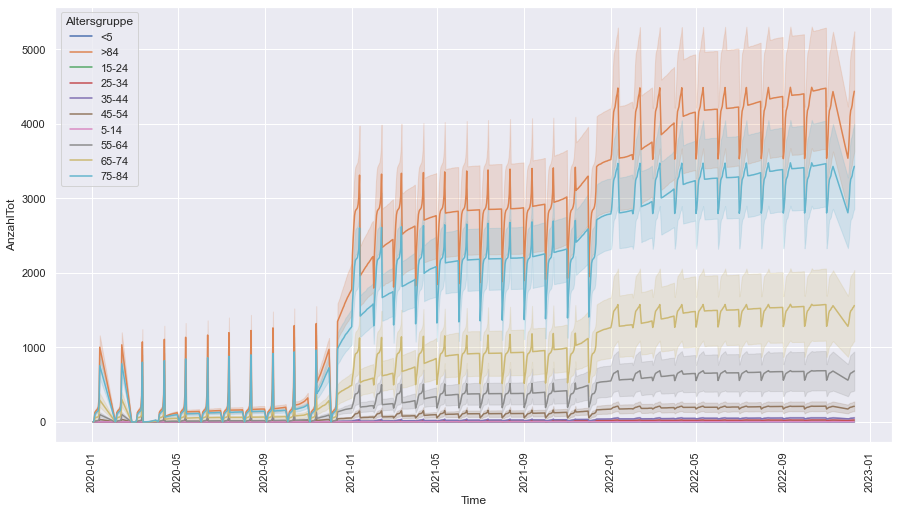

In [190]:
#It takes a little time to show the plot so if you want to customize it and just test it 
# replace the data=df_grouped_bundesland to data=df_grouped_bundesland.head(1000) or something like that to only consider the first 1000 rows
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(x='Time', y='AnzahlTot', hue='Altersgruppe', data=df_grouped_bundesland)
plt.xticks(rotation=90)
plt.show()

In [182]:
df_grouped = df[(df['Bundesland'] == 'Österreich') & (df['Time'] == '10.11.2022 00:00:00')].groupby('Altersgruppe').sum()

In [183]:
df_grouped.head(10)

,AltersgruppeID,AnzEinwohner,Anzahl,AnzahlTot
Altersgruppe,,,,
15-24,6,941982,735821,18
25-34,8,1208961,913311,52
35-44,10,1185121,896736,106
45-54,12,1308912,840750,423
5-14,4,851733,670375,5
55-64,14,1285913,672645,1376
65-74,16,872171,334569,3157
75-84,18,620256,217160,6956
<5,2,433755,111129,5


In [185]:
df_grouped['Proportion of death/10000'] = (df_grouped['AnzahlTot'] / df_grouped['AnzEinwohner'].sum()) * 10000

In [186]:
df_grouped.sort_values('AltersgruppeID', inplace=True)

In [187]:
df_grouped.head(10)

,AltersgruppeID,AnzEinwohner,Anzahl,AnzahlTot,Proportion of death/10000
Altersgruppe,,,,,
<5,2,433755,111129,5,0.005597
5-14,4,851733,670375,5,0.005597
15-24,6,941982,735821,18,0.020151
25-34,8,1208961,913311,52,0.058213
35-44,10,1185121,896736,106,0.118666
45-54,12,1308912,840750,423,0.473543
55-64,14,1285913,672645,1376,1.540414
65-74,16,872171,334569,3157,3.534220
75-84,18,620256,217160,6956,7.787151


<AxesSubplot:xlabel='Altersgruppe', ylabel='Proportion of death/10000'>

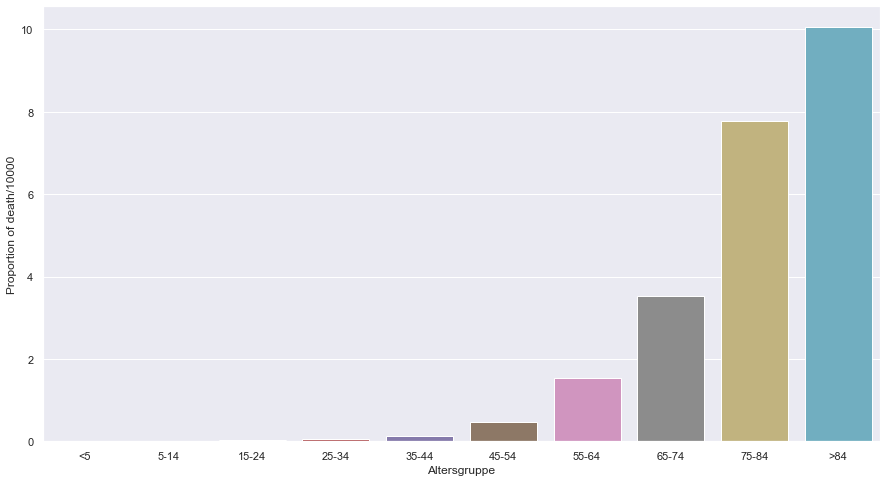

In [188]:
sns.barplot(x=df_grouped.index, y='Proportion of death/10000', data=df_grouped)

In [ ]:
#Angelika's suggestion how the bar chart should look like:

deaths_barchart = sns.barplot(x=df_grouped.index, y='Proportion of death/10000', color = 'orange', data=df_grouped)

plt.xlabel('Age  group', fontsize=12)
plt.ylabel('Number of deaths per 1000 inhabitants', fontsize=12)
plt.title('Total number of COVID-19 deaths per 1000 inhabitants in Austria until 10.11.2022 by age group')
#plt.yticks(labelsize=10)
#plt.tick_params(labelsize=10)
deaths_barchart.tick_params(axis='y', labelsize=12)
plt.show()